In [1]:
#imports
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy.signal as signal #signal processing stuff (e.g. filters, hilbert transform, etc.)
from scipy.stats import linregress
import scipy
import struct
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import svgutils.transform as sg
import sys

#nelpy!
import nelpy as nel  #recommended import for nelpy
import nelpy.plotting as npl  #recommended import for the nelpy plotting library
import nelpy.io.trodes as neltro

from IPython.display import SVG, display, Image

In [2]:
#paper plot settings
%matplotlib inline
mpl.rcdefaults()
sns.set(rc={'figure.figsize': (10, 10),'lines.linewidth': 1, 'font.size': 18, 'axes.labelsize': 16, 'axes.titlesize':18, 'legend.fontsize': 16, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style('white')
sns.set_color_codes(palette='deep')

In [3]:
#load up the data
synthRipAmpl_ind = []
ripDetectThresh_ind = []
synthRipAmpl = []
ripDetectThresh = []
detectLat = []
relDetectLat = []
fpPercent = []
fpRate = []
tpPercent = []
for i in tqdm(range(35)): #loop thru all file directories created
    peaksize = (i*0.15)+5 #vary ripple amplitude from 5 to 10.1 std above the mean
    filedir = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/syntheticRippleAnalysis/ripplepeak"\
               +str(int(round((i*0.15)+5,3)*100))+"/"
    #loop thru all metrics generated
    #store 3 dimensional data (metric value, synthetic ripple amplitude, ripple detection threshold)
    
    for ii in range(25): #looping thru metrics
        thresh_file_ext = str(int(((ii*0.25)+3)*100))
        detectLat_file = filedir+"detectionLatency"+thresh_file_ext+".out"
        relDetectLat_file = filedir+"relativeDetectionLatency"+thresh_file_ext+".out"
        fpPercent_file = filedir+"fpPercent"+thresh_file_ext+".out"
        fpRate_file = filedir+"fpRate"+thresh_file_ext+".out"
        tpRate_file = filedir+"tpRate"+thresh_file_ext+".out"
        
        synthRipAmpl.append(float(round((i*0.15)+5,3)))
        synthRipAmpl_ind.append(i)
        ripDetectThresh.append(float(((ii*0.25)+3)))
        ripDetectThresh_ind.append(ii)
        detectLat.append(np.loadtxt(detectLat_file))
        relDetectLat.append(np.loadtxt(relDetectLat_file))
        fpPercent.append(np.loadtxt(fpPercent_file)*100)
        fpRate.append(np.loadtxt(fpRate_file))
        tpPercent.append(np.loadtxt(tpRate_file)*100)
        
synthRipAmpl_ind = np.asarray(synthRipAmpl_ind)
ripDetectThresh_ind = np.asarray(ripDetectThresh_ind)
synthRipAmpl = np.asarray(synthRipAmpl)
ripDetectThresh = np.asarray(ripDetectThresh)
detectLat = np.asarray(detectLat)
relDetectLat = np.asarray(relDetectLat)
fpPercent = np.asarray(fpPercent)
fpRate = np.asarray(fpRate)
tpPercent = np.asarray(tpPercent)

100%|██████████| 35/35 [00:00<00:00, 123.81it/s]


## Panel (a)

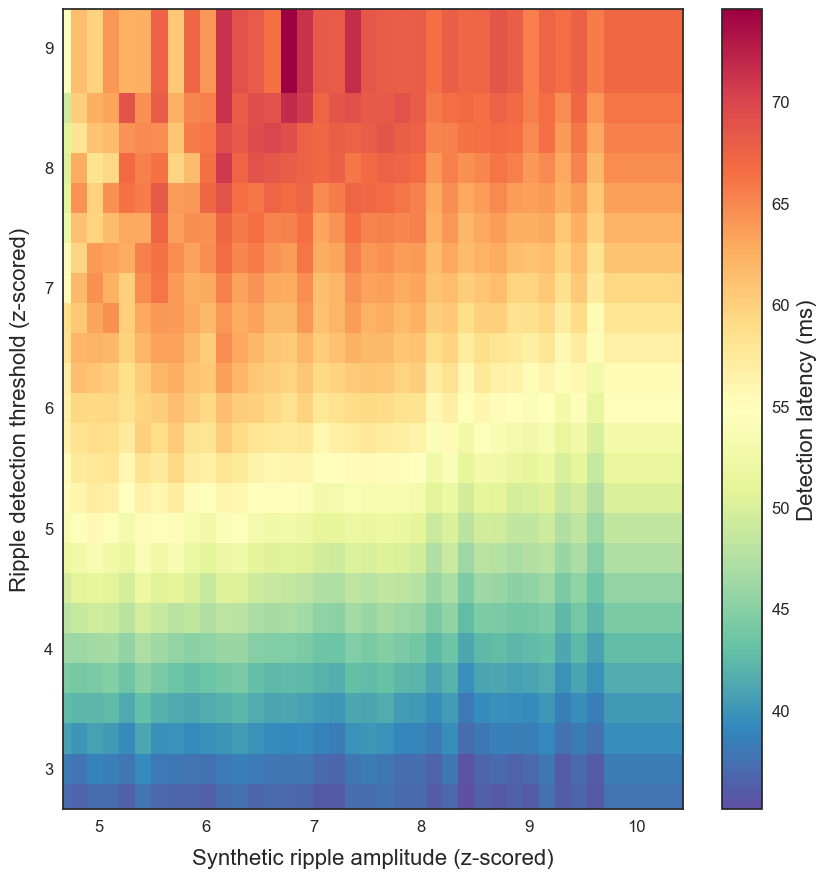

In [4]:
savefig = True
fig = plt.figure()
ax = fig.gca()
plt.scatter(synthRipAmpl, ripDetectThresh, c=detectLat,cmap="Spectral_r",s=4000,marker='s',edgecolor='')
plt.colorbar(label="Detection latency (ms)")
ax.set_xlabel("Synthetic ripple amplitude (z-scored)",labelpad=10)
ax.set_ylabel("Ripple detection threshold (z-scored)",labelpad=10)

ax.set_ylim(bottom=min(ripDetectThresh)-0.33,top=max(ripDetectThresh)+0.33)
ax.set_xlim(left=min(synthRipAmpl)-0.33,right=max(synthRipAmpl)+0.33)

if(savefig):
    plt.savefig("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig4_synthanalysis/detectlat.svg")
plt.show()

## Panel (b)

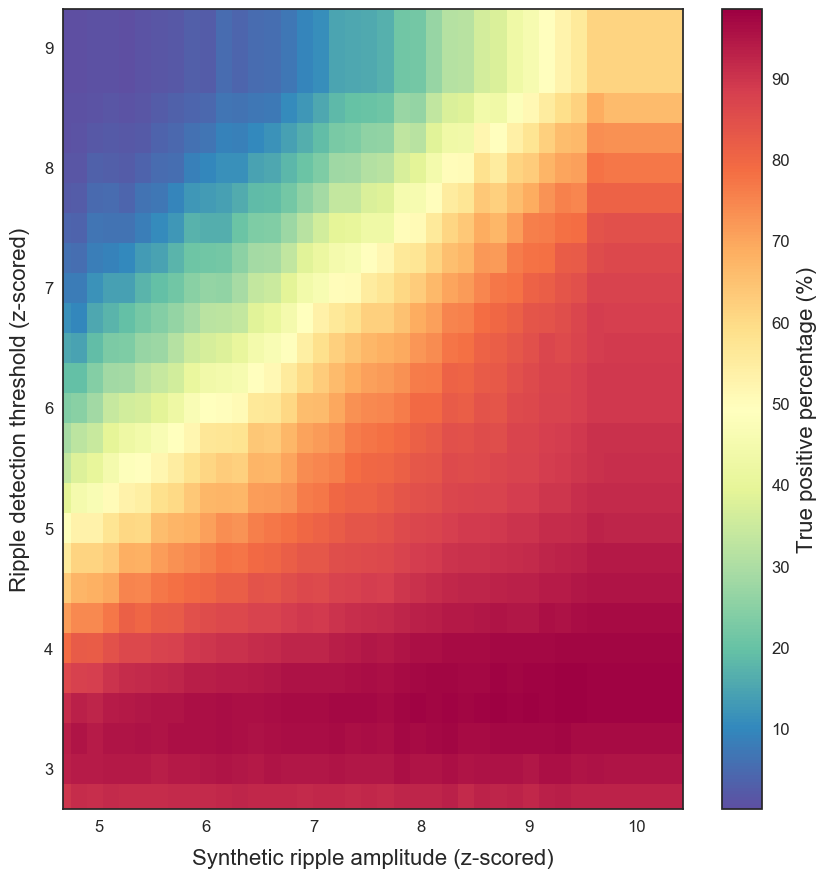

In [5]:
savefig = True
fig = plt.figure()
ax = fig.gca()
plt.scatter(synthRipAmpl, ripDetectThresh, c=tpPercent,cmap="Spectral_r",s=4000,marker='s',edgecolors="")
plt.colorbar(label="True positive percentage (%)")
ax.set_xlabel("Synthetic ripple amplitude (z-scored)",labelpad=10)
ax.set_ylabel("Ripple detection threshold (z-scored)",labelpad=10)

ax.set_ylim(bottom=min(ripDetectThresh)-0.33,top=max(ripDetectThresh)+0.33)
ax.set_xlim(left=min(synthRipAmpl)-0.33,right=max(synthRipAmpl)+0.33)

if(savefig):
    plt.savefig("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig4_synthanalysis/tp.svg")
plt.show()

## Panel (c)

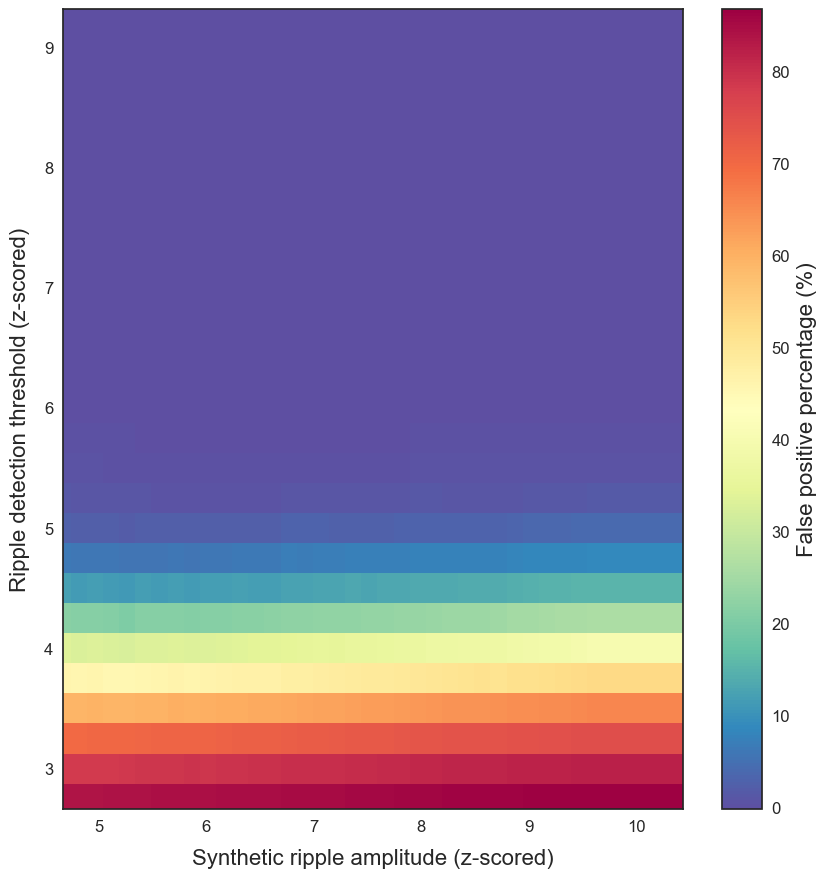

In [6]:
savefig = True

fig = plt.figure()
ax = fig.gca()
plt.scatter(synthRipAmpl, ripDetectThresh, c=fpPercent,cmap="Spectral_r",s=4000,marker='s',edgecolors="")
plt.colorbar(label="False positive percentage (%)")
ax.set_xlabel("Synthetic ripple amplitude (z-scored)",labelpad=10)
ax.set_ylabel("Ripple detection threshold (z-scored)",labelpad=10)

ax.set_ylim(bottom=min(ripDetectThresh)-0.33,top=max(ripDetectThresh)+0.33)
ax.set_xlim(left=min(synthRipAmpl)-0.33,right=max(synthRipAmpl)+0.33)

if(savefig):
    plt.savefig("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig4_synthanalysis/fp.svg")
plt.show()

# Figurize!

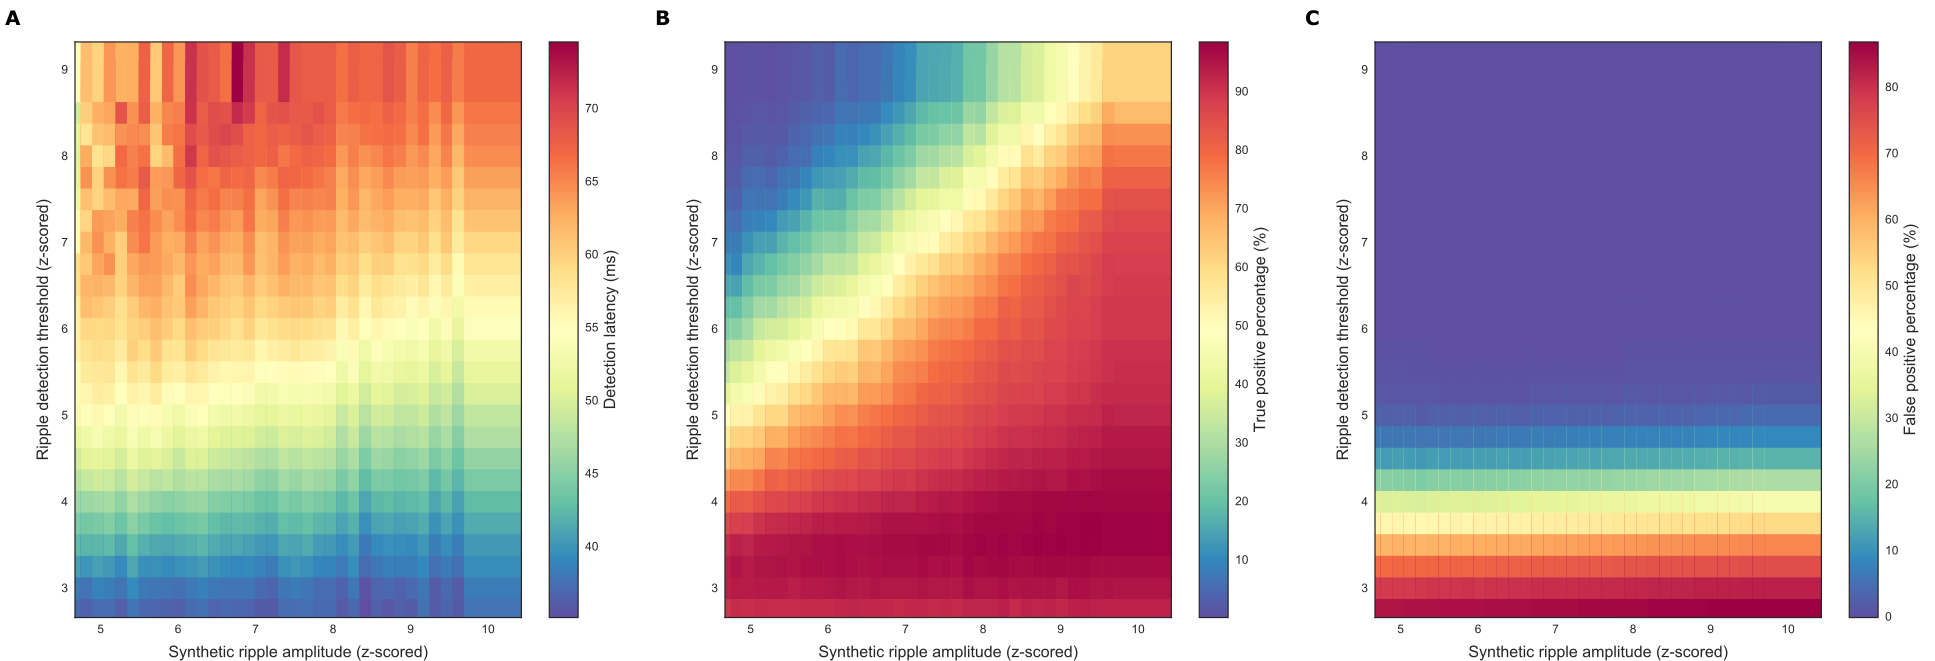

In [7]:
#create new SVG figure
fig = sg.SVGFigure("21.5in","7.35in")

#load matplotlib-generated figures
fig1 = sg.fromfile("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig4_synthanalysis/detectlat.svg")
fig2 = sg.fromfile("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig4_synthanalysis/tp.svg")
fig3 = sg.fromfile("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig4_synthanalysis/fp.svg")

#get the plot objects
plot1 = fig1.getroot()
plot2 = fig2.getroot()
plot3 = fig3.getroot()

spacing = 650

plot1.moveto(-15,-30,scale=1)
plot2.moveto(-15+spacing,-30,scale=1)
plot3.moveto(-15+spacing+spacing,-30,scale=1)
fig.append([plot1,plot2,plot3])

#add text labels
txt1 = sg.TextElement(5,25,"A",size=20,weight="bold")
txt2 = sg.TextElement(5+spacing,25,"B",size=20,weight="bold")
txt3 = sg.TextElement(5+spacing+spacing,25,"C",size=20,weight="bold")
fig.append([txt1, txt2, txt3])

#save
fig.save("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig4_synthanalysis/fig4Final.svg")
os.system("inkscape --export-pdf=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig4_synthanalysis/fig4Final.pdf /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig4_synthanalysis/fig4Final.svg")
os.system("inkscape --export-png=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig4_synthanalysis/fig4Final.png /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig4_synthanalysis/fig4Final.svg")
display(Image(filename='/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig4_synthanalysis/fig4Final.png'))